In [1]:
install.packages("readr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("caret")
install.packages("class")  # Included in the base R package
install.packages("e1071")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package

In [7]:
library(readr)
library(dplyr)
library(ggplot2)
library(caret)
library(class)
library(e1071)
library(rpart)
library(rpart.plot)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice



# DATA LOADING

In [4]:
# Load the dataset
heart_data <- read.csv("/content/heart.csv")

# INSPECTING DATA

In [14]:
# Initial exploration
str(heart_data)
summary(heart_data)
head(heart_data, 5)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# DATA VISUALIZATION

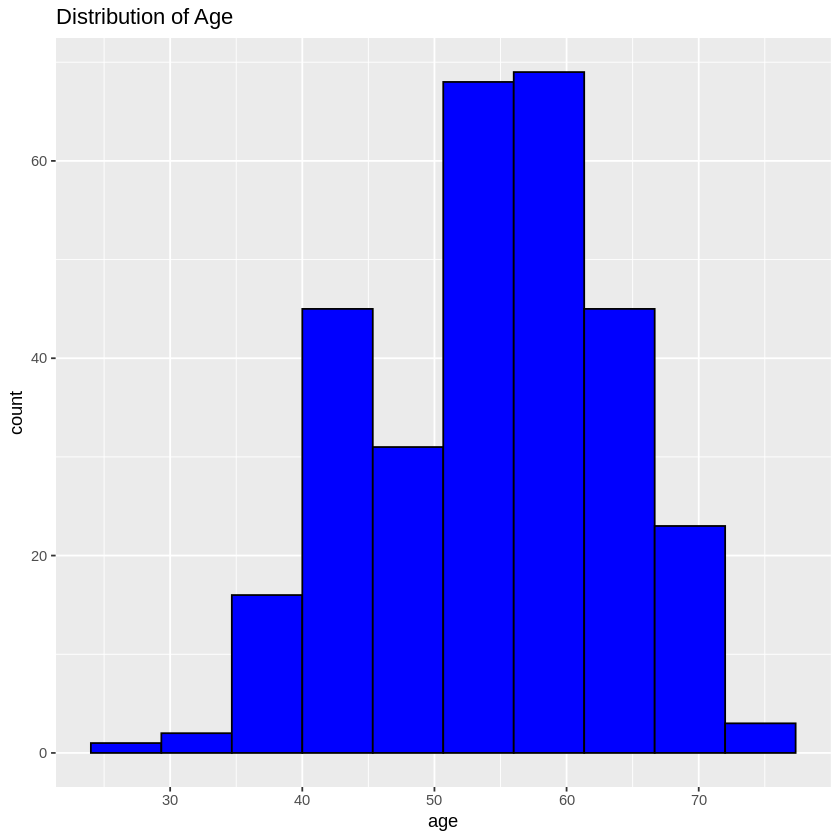

In [8]:
# Basic visualization of data distribution
ggplot(heart_data, aes(x = age)) + geom_histogram(bins = 10, fill = "blue", color = "black") +
  ggtitle("Distribution of Age")

In [9]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(corrplot)

corrplot 0.95 loaded



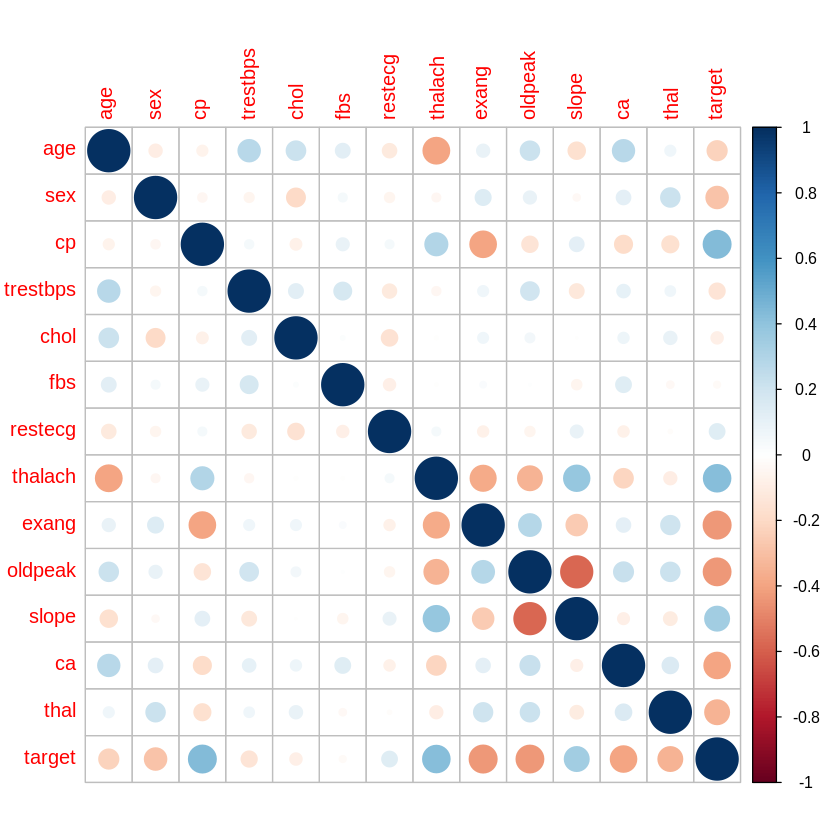

In [11]:
# Correlation matrix visualization
correlations <- cor(heart_data[, sapply(heart_data, is.numeric)])
corrplot(correlations, method = "circle")

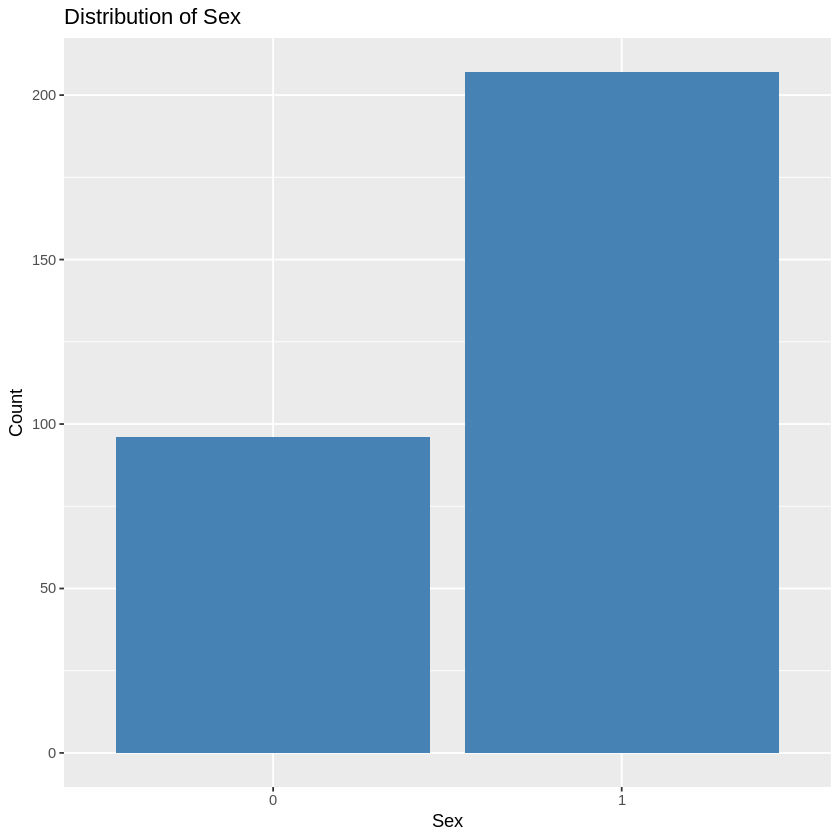

In [12]:
# Bar charts for categorical variables (example with 'sex' variable)
ggplot(heart_data, aes(x = as.factor(sex))) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Sex", x = "Sex", y = "Count")


# DATA PREPROCESSING

In [15]:
# Check for missing values
sum(is.na(heart_data))

[1] 0

In [16]:
# Encode categorical variables if not already factors
heart_data$sex <- as.factor(heart_data$sex)
heart_data$cp <- as.factor(heart_data$cp)
heart_data$fbs <- as.factor(heart_data$fbs)
heart_data$restecg <- as.factor(heart_data$restecg)
heart_data$exang <- as.factor(heart_data$exang)
heart_data$slope <- as.factor(heart_data$slope)
heart_data$ca <- as.factor(heart_data$ca)
heart_data$thal <- as.factor(heart_data$thal)

In [18]:
# Set seed for reproducibility
set.seed(123)

# Create indices for splitting the data into training and testing
train_data_selection <- sample(nrow(heart_data), size = 0.7 * nrow(heart_data))

# Split the data into training and testing datasets
train_data <- heart_data[train_data_selection, ]
test_data <- heart_data[-train_data_selection, ]


In [19]:
# Check the structure of the training data
str(train_data)
# Summary of the training data
summary(train_data)

# Check the structure of the testing data
str(test_data)
# Summary of the testing data
summary(test_data)


'data.frame':	212 obs. of  14 variables:
 $ age     : int  43 64 60 56 57 59 57 57 64 58 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 1 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 1 4 3 4 1 4 1 1 4 1 ...
 $ trestbps: int  120 110 140 120 140 170 152 130 170 100 ...
 $ chol    : int  177 211 185 193 241 288 274 131 227 248 ...
 $ fbs     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 1 1 1 1 2 1 2 2 1 1 ...
 $ thalach : int  120 144 155 162 123 159 88 115 155 122 ...
 $ exang   : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 2 2 1 1 ...
 $ oldpeak : num  2.5 1.8 3 1.9 0.2 0.2 1.2 1.2 0.6 1 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 2 2 1 1 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 4 3 3 4 4 4 4 4 4 3 ...
 $ target  : int  0 1 0 1 0 0 0 0 1 1 ...


      age        sex     cp         trestbps          chol       fbs    
 Min.   :29.00   0: 68   0:100   Min.   : 94.0   Min.   :126.0   0:176  
 1st Qu.:48.00   1:144   1: 30   1st Qu.:120.0   1st Qu.:211.0   1: 36  
 Median :56.50           2: 62   Median :130.0   Median :241.5          
 Mean   :54.58           3: 20   Mean   :132.4   Mean   :246.1          
 3rd Qu.:62.00                   3rd Qu.:140.0   3rd Qu.:274.0          
 Max.   :71.00                   Max.   :200.0   Max.   :564.0          
 restecg    thalach      exang      oldpeak      slope   ca      thal   
 0:102   Min.   : 88.0   0:146   Min.   :0.000   0: 13   0:122   0:  1  
 1:108   1st Qu.:138.8   1: 66   1st Qu.:0.000   1:101   1: 41   1: 11  
 2:  2   Median :153.5           Median :0.800   2: 98   2: 33   2:117  
         Mean   :150.3           Mean   :1.063           3: 12   3: 83  
         3rd Qu.:163.2           3rd Qu.:1.800           4:  4          
         Max.   :202.0           Max.   :6.200     

'data.frame':	91 obs. of  14 variables:
 $ age     : int  37 41 44 48 58 66 43 51 41 54 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 2 1 1 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 3 2 2 3 4 4 1 3 2 3 ...
 $ trestbps: int  130 130 120 130 150 150 150 110 105 135 ...
 $ chol    : int  250 204 263 275 283 226 247 175 198 304 ...
 $ fbs     : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 2 ...
 $ restecg : Factor w/ 3 levels "0","1","2": 2 1 2 2 1 2 2 2 2 2 ...
 $ thalach : int  187 172 173 139 162 114 171 123 168 170 ...
 $ exang   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ oldpeak : num  3.5 1.4 0 0.2 1 2.6 1.5 0.6 0 0 ...
 $ slope   : Factor w/ 3 levels "0","1","2": 1 3 3 3 3 1 3 3 3 3 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 2 1 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 3 3 4 3 3 3 3 3 3 3 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


      age        sex    cp        trestbps          chol       fbs    restecg
 Min.   :34.00   0:28   0:43   Min.   :105.0   Min.   :149.0   0:82   0:45   
 1st Qu.:47.00   1:63   1:20   1st Qu.:120.0   1st Qu.:211.5   1: 9   1:44   
 Median :54.00          2:25   Median :130.0   Median :240.0          2: 2   
 Mean   :53.88          3: 3   Mean   :129.8   Mean   :246.5                 
 3rd Qu.:59.50                 3rd Qu.:140.0   3rd Qu.:275.5                 
 Max.   :77.00                 Max.   :160.0   Max.   :409.0                 
    thalach      exang     oldpeak       slope  ca     thal       target      
 Min.   : 71.0   0:58   Min.   :0.0000   0: 8   0:53   0: 1   Min.   :0.0000  
 1st Qu.:130.0   1:33   1st Qu.:0.0000   1:39   1:24   1: 7   1st Qu.:0.0000  
 Median :152.0          Median :0.6000   2:44   2: 5   2:49   Median :1.0000  
 Mean   :148.2          Mean   :0.9846          3: 8   3:34   Mean   :0.5165  
 3rd Qu.:168.5          3rd Qu.:1.5500          4: 1       

# Visualize the Split Data

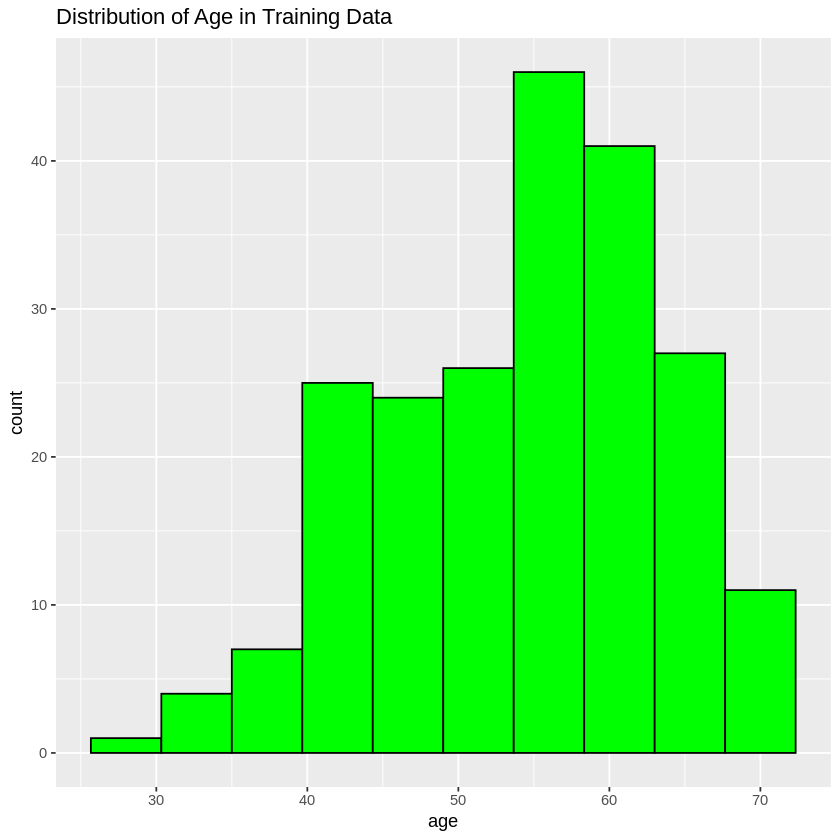

In [20]:
# Histogram of Age for training data
ggplot(train_data, aes(x = age)) +
  geom_histogram(bins = 10, fill = "green", color = "black") +
  ggtitle("Distribution of Age in Training Data")

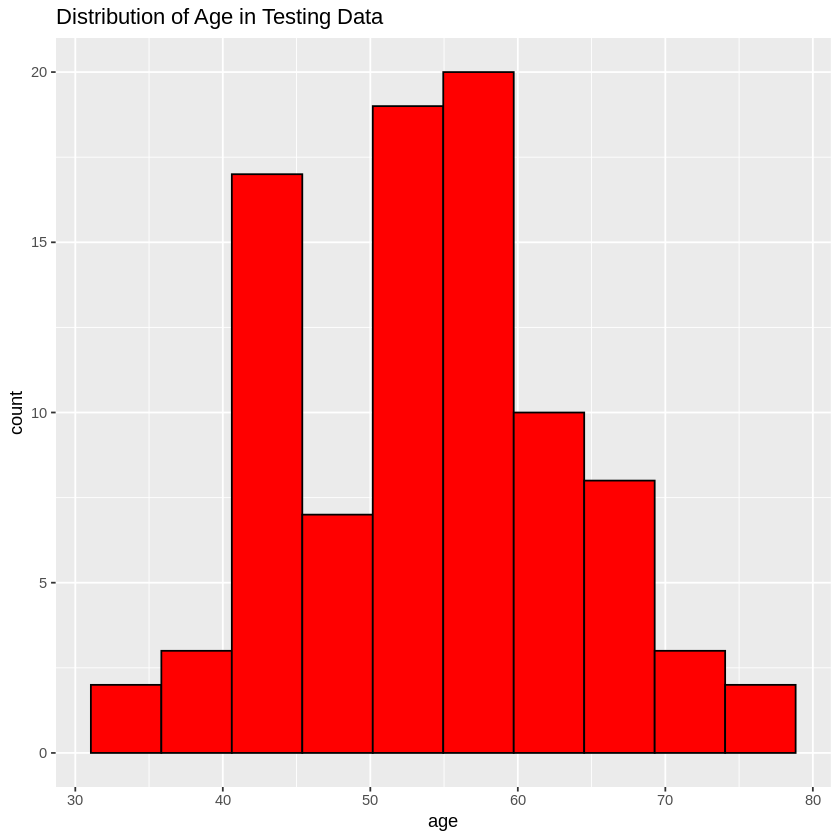

In [21]:
# Histogram of Age for testing data
ggplot(test_data, aes(x = age)) +
  geom_histogram(bins = 10, fill = "red", color = "black") +
  ggtitle("Distribution of Age in Testing Data")


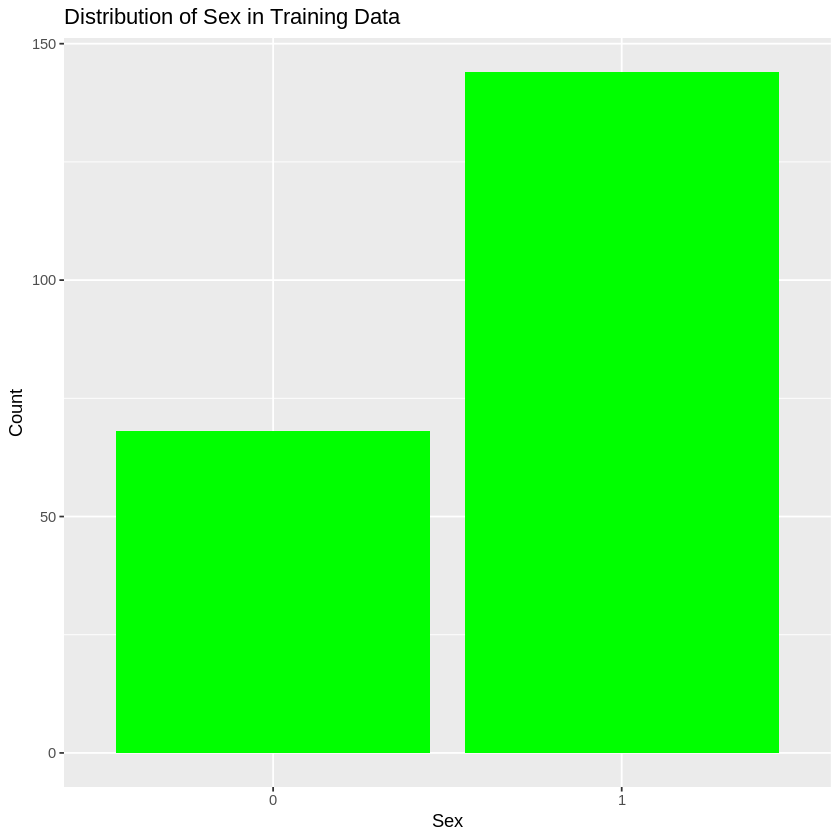

In [22]:
# Bar chart of Sex distribution in training data
ggplot(train_data, aes(x = as.factor(sex))) +
  geom_bar(fill = "green") +
  labs(title = "Distribution of Sex in Training Data", x = "Sex", y = "Count")

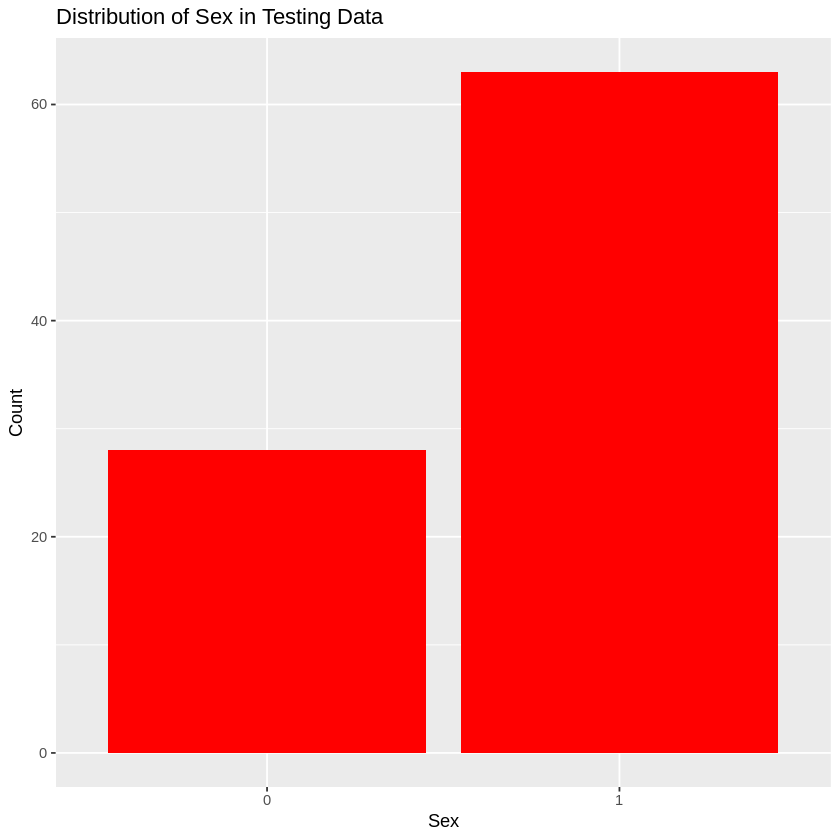

In [23]:
# Bar chart of Sex distribution in testing data
ggplot(test_data, aes(x = as.factor(sex))) +
  geom_bar(fill = "red") +
  labs(title = "Distribution of Sex in Testing Data", x = "Sex", y = "Count")

# KNN Algorithm Implementation

         Actual
Predicted  0  1
        0 26 13
        1 18 34

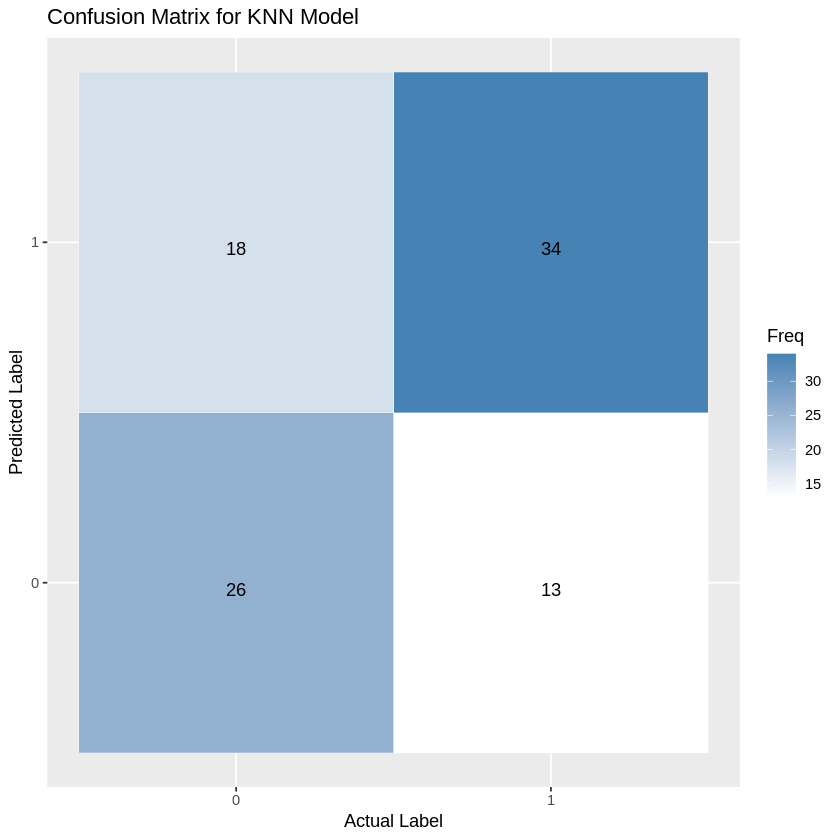

In [24]:
# Load necessary library for KNN
library(class)

# Prepare the predictor variables and target variable for KNN
train_predictors <- train_data[, -which(names(train_data) == "target")]  # Assuming 'target' is the name of your outcome column
train_target <- train_data$target

test_predictors <- test_data[, -which(names(test_data) == "target")]
test_target <- test_data$target

# Train the KNN model
knn_model <- knn(train = train_predictors, test = test_predictors, cl = train_target, k = 21)

# Predictions and Model Evaluation
knn_predictions <- knn(train = train_predictors, test = test_predictors, cl = train_target, k = 21)
table(Predicted = knn_predictions, Actual = test_target)

# Visualization of KNN results
library(ggplot2)
conf_matrix <- table(Predicted = knn_predictions, Actual = test_target)
ggplot(as.data.frame(conf_matrix), aes(x = Actual, y = Predicted)) +
  geom_tile(aes(fill = Freq), colour = "white") +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix for KNN Model", x = "Actual Label", y = "Predicted Label")

# Save the KNN Model
saveRDS(knn_model, file = "/content/KNN_heart.rds")


# Implementing the Naive Bayes Algorithm

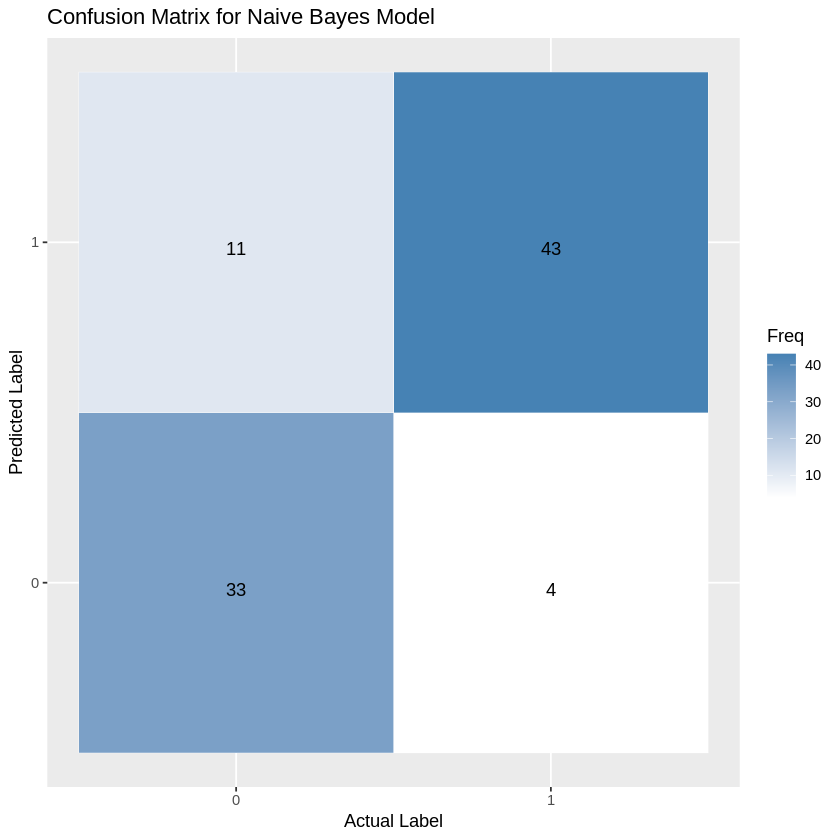

In [25]:
# Load necessary library for Naive Bayes
library(e1071)

# Train the Naive Bayes model
nb_model <- naiveBayes(train_predictors, as.factor(train_target))

# Predictions and Model Evaluation
nb_predictions <- predict(nb_model, test_predictors)
nb_conf_matrix <- table(Predicted = nb_predictions, Actual = test_target)

# Visualization of Naive Bayes results
ggplot(as.data.frame(nb_conf_matrix), aes(x = Actual, y = Predicted)) +
  geom_tile(aes(fill = Freq), colour = "white") +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix for Naive Bayes Model", x = "Actual Label", y = "Predicted Label")

# Save the Naive Bayes Model
saveRDS(nb_model, file = "/content/NAIVE_BAYES_heart.rds")


# Implementing the SVM Algorithm

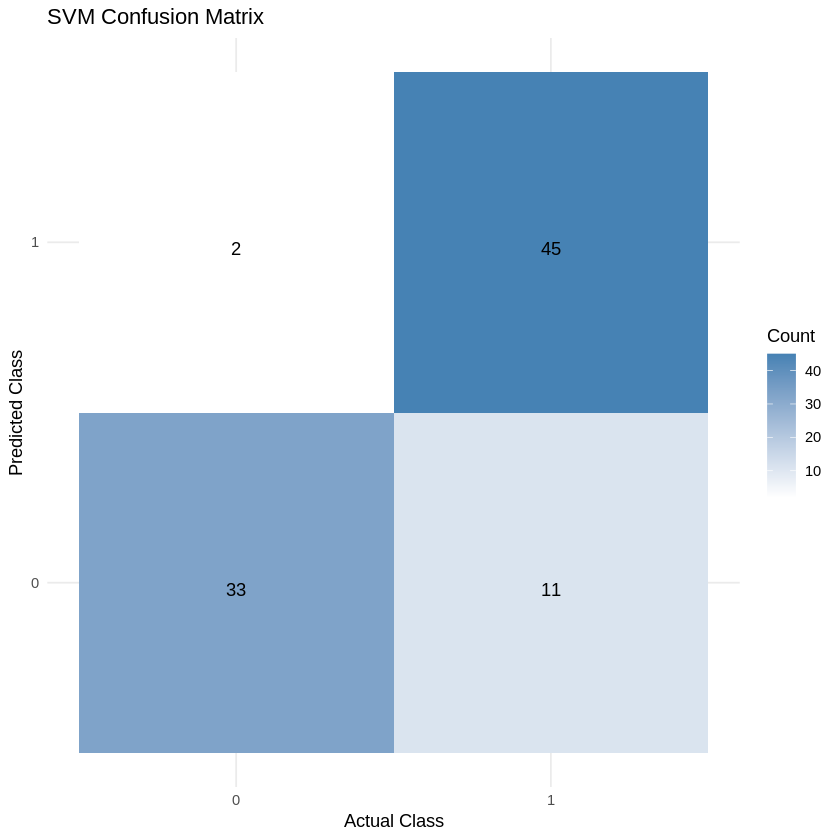

In [44]:
# Load necessary library for Naive Bayes
library(e1071)

# Train the SVM model on the prepared data
# Assuming 'train_predictors' and 'train_target' are already scaled and prepared
svm_model <- svm(train_target ~ ., data = data.frame(train_predictors, train_target = train_target), type = 'C-classification', kernel = 'linear')

# Predict using the SVM model
svm_predictions <- predict(svm_model, newdata = test_predictors)

# Evaluate the model with a confusion matrix
svm_cm <- table(Predicted = svm_predictions, Actual = test_target)

# Visualization of SVM results using ggplot2
library(ggplot2)
df_svm_cm <- as.data.frame(as.table(svm_cm))
colnames(df_svm_cm) <- c("Actual", "Predicted", "Count")

ggplot(df_svm_cm, aes(x = Actual, y = Predicted, fill = Count)) +
  geom_tile() +
  geom_text(aes(label = Count), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  theme_minimal() +
  labs(title = "SVM Confusion Matrix", x = "Actual Class", y = "Predicted Class")

# Save the SVM model
saveRDS(svm_model, file = "/content/SVM_heart.rds")

# MODEL ACCURACY COMPARISON

In [46]:
# Calculate accuracy for each model
knn_accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)  # Using the conf_matrix from KNN
nb_accuracy <- sum(diag(nb_conf_matrix)) / sum(nb_conf_matrix)  # Using the nb_conf_matrix from Naive Bayes
svm_accuracy <- sum(diag(svm_cm)) / sum(svm_cm)  # Using the svm_cm from SVM


In [47]:
# Create a data frame with model accuracies
model_accuracies <- data.frame(
  Model = c("KNN", "Naive Bayes", "SVM"),
  Accuracy = c(knn_accuracy, nb_accuracy, svm_accuracy)
)


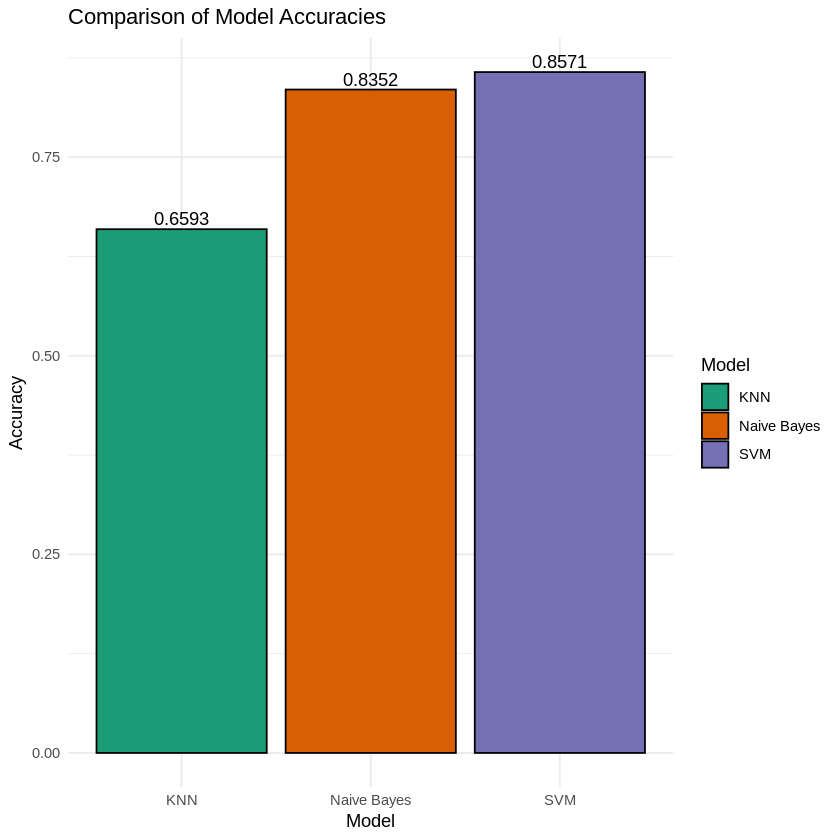

In [48]:
# Load ggplot2 if not already loaded
 library(ggplot2)

# Bar chart to compare model accuracies
ggplot(model_accuracies, aes(x = Model, y = Accuracy, fill = Model)) +
  geom_bar(stat = "identity", color = "black") +
  geom_text(aes(label = round(Accuracy, 4)), vjust = -0.3) +
  ggtitle("Comparison of Model Accuracies") +
  ylab("Accuracy") + xlab("Model") +
  theme_minimal() +
  scale_fill_brewer(palette = "Dark2")
